# Capstone 1

   Heart disease is the leading cause of death for both men and women in the United States. About 610,000 people die every year- that's equivalent to 1 in every 4 deaths according to the Center for Disease Control. With heart disease being so prevalent, it's vital to understand who is most at risk for this disease. A way that helps providers diagnose heart disease is through stress test. A thallium stresst test is a method that shows how well blood flows into the heart muscle, both at rest and during activity.
   
   In this capstone, we explore a data set that was obtained from tin the University of California, Irvine,  machine learning repository (via Kaggle). It consists of 14 variables measured on 303 individuals that underwent a thallium stress test. 
    
   As a medical professional, it would be wonderful to get some insight from the this data set, as I've encountered many patients with heart disease. Our goal for this report is to explore that data and determine correlations between heart disease and various variables from the data set. 


   









 
      
 # What questions can we look into from this data set?

1. What does age and gender reveal about heart disease? 
2. Is chest pain a good indicator of heart disease?
3. Is there a correlation between exercise induced CP and heart disease ? 
4. Is there a correlation between max heart rate achieved levels and heart disease?
5. Does cholesterol level and restbp have any correlation with heart disease.

First, let's look at the data. 


In [495]:
#let's start the imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


heart=pd.read_csv('heart.csv')


In [355]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,target_label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Heart Disease
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Heart Disease
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Heart Disease
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Heart Disease
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Heart Disease


In [517]:
heart.rename(index=str, columns={"thalach": "maxHR", "ca":"artery"}, inplace=True)
heart['result'] = ['Heart Disease' if v == 1 else 'No Heart Disease' for v in heart.target.values]
heart['gender'] = ['Male' if v == 1 else 'Female' for v in heart.sex.values]
heart['exercise'] = ['Exercise Induced CP' if v == 1 else 'No CP' for v in heart.sex.values]
heart.head()
#Just to make some variables understandable

,age,sex,cp,trestbps,chol,fbs,restecg,maxHR,exang,oldpeak,slope,artery,thal,target,result,gender,excercise,exercise
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Heart Disease,Male,Exercise Induced CP,Exercise Induced CP
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Heart Disease,Male,Exercise Induced CP,Exercise Induced CP
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Heart Disease,Female,No CP,No CP
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Heart Disease,Male,Exercise Induced CP,Exercise Induced CP
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Heart Disease,Female,No CP,No CP


# Values in the data set include:

sex:(0 = female, 1 = male )

cp: chest pain type
    Value 0: typical angina  
    Value 1: atypical angina 
    Value 2: non-anginal pain  
    Value 3: asymptomatic  

trestbpsresting blood pressure (in mm Hg on admission to the hospital)

chol: serum cholestoral in mg/dl

fbs(fasting blood sugar > 120 mg/dl) (0 = false, 1 = true )

restecg: resting electrocardiographic results
 resting electrocardiographic results -- 
 Value 0: normal 
 Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 


The data set has inconsistencies in the artery column and thal(stress test result) column. Due to this, I've decided not to explore these variables and it's correlation with heart disease.  

In [356]:
#Let's take a look at the data.
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
age             303 non-null int64
sex             303 non-null int64
cp              303 non-null int64
trestbps        303 non-null int64
chol            303 non-null int64
fbs             303 non-null int64
restecg         303 non-null int64
thalach         303 non-null int64
exang           303 non-null int64
oldpeak         303 non-null float64
slope           303 non-null int64
ca              303 non-null int64
thal            303 non-null int64
target          303 non-null int64
target_label    303 non-null object
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB


In [357]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Let's see how many of our population have disease vs. no disease


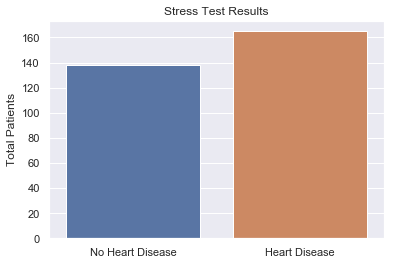

The percentage of our population with heart disease is 54%


In [358]:
sns.set(font_scale=1)
sns.countplot(heart.target)

plt.xticks([0,1],['No Heart Disease', 'Heart Disease'])
plt.xlabel('')
plt.ylabel('Total Patients')
plt.title('Stress Test Results')
plt.show()

percent=heart[(heart.target)==1].shape[0]/heart.shape[0]
percent= (round(percent, 2))
print ('The percentage of our population with heart disease is {0:.0%}'.format(percent))

# Question 1. What does age and gender reveal about heart disease?

1st, let's look at the age of our sample. 

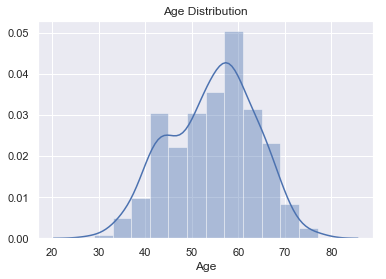

The average age of our sample is 54.0
Here, we see a normal distribution of age.


In [319]:
sns.distplot(heart.age)
plt.xlabel('Age')
plt.ylabel('')
plt.title('Age Distribution')
plt.show()
s=round(heart.age.mean())
print("The average age of our sample is {}".format(s))
print("Here, we see a normal distribution of age.")

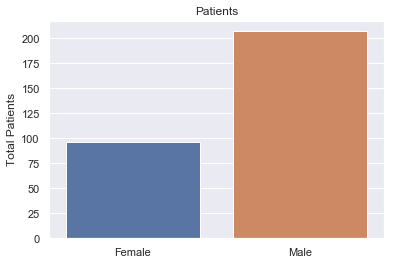

There are 207 male and 96 female.


In [359]:
sns.set()
sns.countplot(heart.sex)
plt.xticks([0,1],['Female', 'Male'])
plt.xlabel('')
plt.ylabel('Total Patients')
plt.title('Patients')
plt.show()


female= heart.loc[(heart.sex==0)].shape[0] 
male= heart.loc[(heart.sex==1)].shape[0] 
print ('There are {} male and {} female.'.format(male, female))

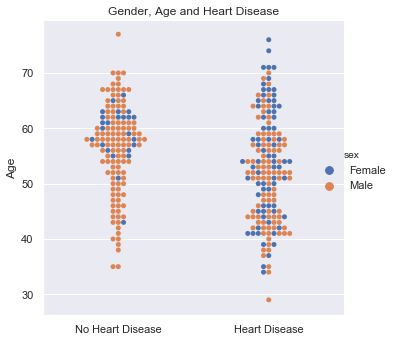

There are 72 women and 93 men with heart disease
Percentage of women with disease: 75%
Percentage of men with heart disease: 45%


In [388]:
#Now let's see who has more heart disease, men or women? 
g=sns.catplot(x="target", y="age", hue="sex", kind="swarm", legend_out=True, data=heart)
new_labels = ['Female', 'Male']

plt.xticks([0,1],['No Heart Disease', 'Heart Disease'])
plt.xlabel('')
plt.ylabel('Age')
plt.title('Gender, Age and Heart Disease')

for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

womenhd= heart[(heart.sex==0)&(heart.target==1)].shape[0]
menhd=heart[(heart.sex==1)&(heart.target==1)].shape[0]
womendp= round(heart[(heart.sex==0)&(heart.target==1)].shape[0]/heart[(heart.sex==0)].shape[0], 2)
mendp=round(heart[(heart.sex==1)&(heart.target==1)].shape[0]/heart[(heart.sex==1)].shape[0], 2)

print('There are {} women and {} men with heart disease'.format(womenhd, menhd))
print('Percentage of women with disease: {0:.0%}'.format(womendp))
print('Percentage of men with heart disease: {0:.0%}'.format(mendp))




This reveals that more men are diagnosed than women, but we must also remember that there are more men in this sample. Therefore, we look at percentages. 75% of the women in this sample were diagnosed with heart disease vs. 45% of men. 

This is interesting because both men and women are at risk for developing the disease although the way heart disease, or even heart attack may present can be different between men and women. (CITE). We also know, based from past literature, that women develop heart disease 7-10 years later than men. Menopause also presents risk. Menopause transition is associated with a worsening Coronary Heart Disease risk profile (Maas, 2010). If age is such a big factor for men and women, then let's take a look at the age distribution.


Are women older than men? 





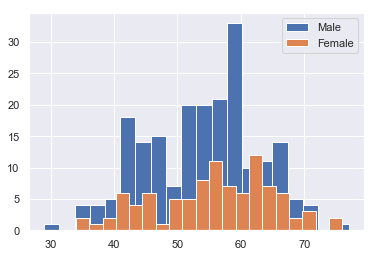

 This shows an equal normal distribution for men and women, 
 but not necessarily that women are older.


In [393]:
heart[heart.sex==1].age.hist(bins=20);
heart[heart.sex==0].age.hist(bins=20);
labels=('Male', 'Female')
plt.legend(labels)
plt.show()
print(' This shows an equal normal distribution for men and women, \n but not necessarily that women are older.')

In [389]:
womenhd=heart[(heart.target ==  1) & (heart.sex == 0)].age.mean()
womenstd=heart[(heart.target ==  1) & (heart.sex == 0)].age.std()
print ('Women with heart disease age mean and std')
print(round(womenhd)) #the average age of women with heart disease
print(round(womenstd))
print('Men with heart disease age mean and std')
menhd= heart[(heart.target == 1) & (heart.sex == 1)].age.mean() 
menstd= heart[(heart.target == 1) & (heart.sex == 1)].age.std() 
print (round(menhd)) #average age of men with heart disease. 
print (round(menstd))

Women with heart disease age mean and std
55.0
10.0
Men with heart disease age mean and std
51.0
9.0


In [688]:
womenAge= heart.loc[heart.sex==0].age
menAge= heart.loc[heart.sex==1].age
print (stats.ttest_ind(womenAge,menAge, equal_var = True))

print ('We FAIL to reject the null hypothesis. There is no significant difference between men and women')

Ttest_indResult(statistic=1.7163220353587778, pvalue=0.08713196071826866)
We FAIL to reject the null hypothesis. There is no significant difference between men and women


# Question 2. Is chest pain a good indicator of heart disease?
Let's look at what type of chest pains patients presented with.

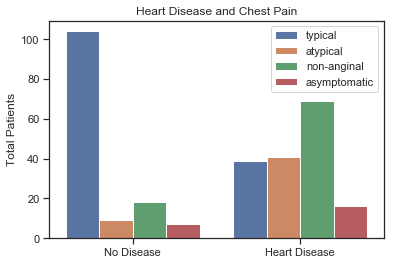

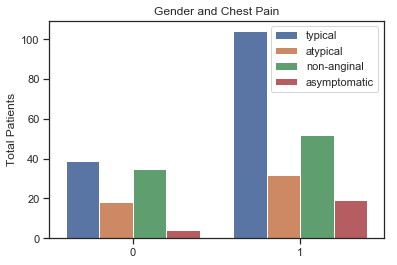

Typical chest pain is the most common type of pain experienced by our patients upon admission.
It looks like more males suffered from type 1 chest pain than women
104 of men suffered from typical chest pain vs 39 women


In [479]:
sns.countplot(heart.target,hue=heart.cp)
plt.title('Heart Disease and Chest Pain')
plt.legend(['typical','atypical', 'non-anginal', 'asymptomatic'])
plt.xticks([0,1],['No Disease', 'Heart Disease'])
plt.xlabel('')
plt.ylabel('Total Patients')
plt.show()
                        
sns.countplot(heart.sex, hue=heart.cp)
plt.title('Gender and Chest Pain')
plt.legend(['typical','atypical', 'non-anginal', 'asymptomatic'])

plt.xlabel('')
plt.ylabel('Total Patients')
plt.show()
print('Typical chest pain is the most common type of pain experienced by our patients upon admission.')
print('It looks like more males suffered from type 1 chest pain than women')
men=heart[(heart.sex==1) & (heart.cp==0)].shape[0]
women=heart[(heart.sex==0) & (heart.cp==0)].shape[0]
print('{} men suffered from typical chest pain vs {} women'.format(men, women))

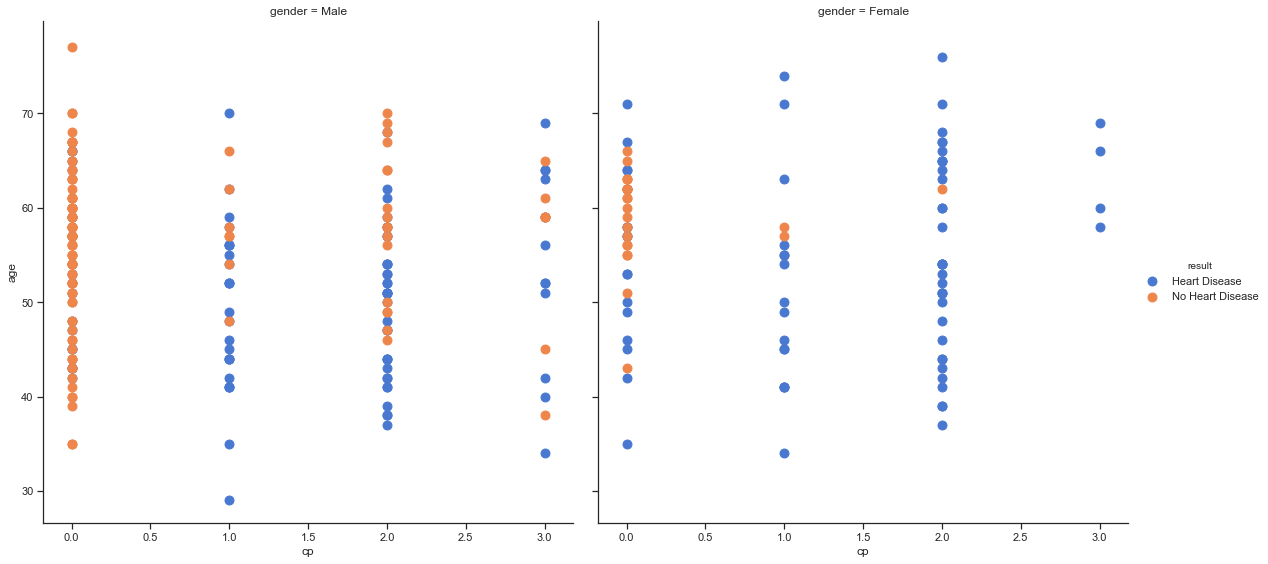

In [498]:

sns.set(style="ticks")

ax= sns.lmplot(x="cp", y="age", col="gender", hue="result", data=heart,
           col_wrap=2, palette="muted", height=8, fit_reg=False, legend=True,
           scatter_kws={"s": 80, "alpha": 1})

plt.show()





In [473]:
a=heart[(heart.sex==0)&(heart.target==1)&(heart.cp==2)].shape[0]/heart[(heart.sex==0)&(heart.target==1)].shape[0]
b=heart[(heart.sex==1)&(heart.target==1)&(heart.cp==2)].shape[0]/heart[(heart.sex==1)&(heart.target==1)].shape[0]
print (round(a, 2))
print (round(b, 2))

0.47
0.38


 Chest pain type 2, which is non-anginal chest pain is the most common type of chest pain in women and men. Around 47% of women had this chest pain and is positive for heart disease vs. 38% of men. Based on this observation, we can support the fact that women can present heart disease differently than men, almost half our female participants that were diagnosed with heart disease suffered from non-anginal chest pain. Not to be confused with aytpical chest pain, non-anginal pain means pain originating from another part of body other than chest. It could be jaw pain, shoulder pain or back pain (Mayo Clinic).
This supports the current studies about women presenting differently than men. 

# 3. What about chest pain during exercise(stress test)? Is there any correlation with heart disease?

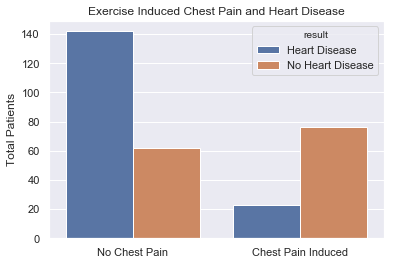

 Here we learned that during stress test, only a small fraction of
 patients had exercise induced angina and was positive for heart disease.
 Only 23 patients are both positive for heart disease and had chest pain induced during exercise.


In [678]:
sns.set(style="darkgrid")
ax = sns.countplot(x="exang", hue="result", data=heart)
plt.title('Exercise Induced Chest Pain and Heart Disease')
plt.xticks([0,1], ('No Chest Pain', 'Chest Pain Induced'))
plt.xlabel('')
plt.ylabel('Total Patients')
plt.show()

posex= heart[(heart.exang==1) & (heart.target==1)].shape[0]

print (' Here we learned that during stress test, only a small fraction of\n patients had exercise induced angina and was positive for heart disease.') 
print(' Only {} patients are both positive for heart disease and had chest pain induced during exercise.'.format(posex))


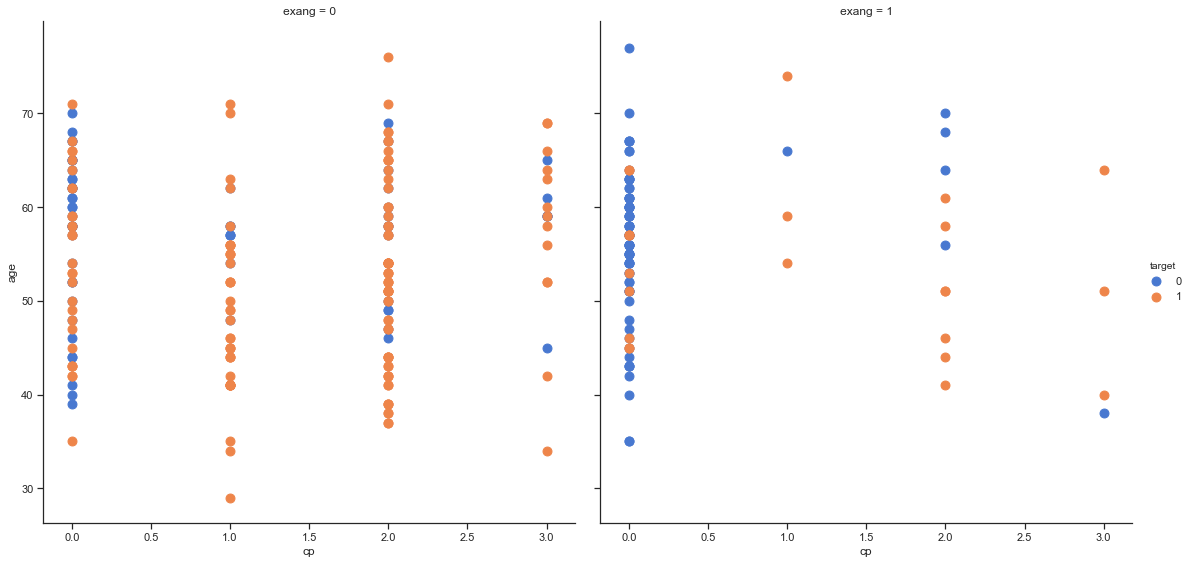

80 patients that had typical chest pain also felt pain during exercise
63 patients that had typical chest pain did not feel pain during exercise


In [606]:
sns.set(style="ticks")
sns.lmplot(x="cp", y="age", col="exang", hue="target", data=heart,
           col_wrap=2, ci=None, palette="muted", height=8, fit_reg=False,
           scatter_kws={"s": 80, "alpha": 1} )
plt.show()

excp0= heart[(heart.exang==0) & (heart.cp==0)].shape[0]
excp1= heart[(heart.exang==1) & (heart.cp==0)].shape[0]

print('{} patients that had typical chest pain also felt pain during exercise'.format(excp1))
print('{} patients that had typical chest pain did not feel pain during exercise'.format(excp0))

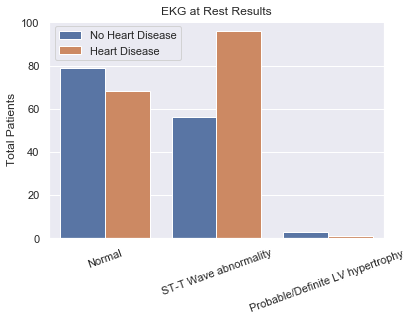

This confirms my experience in the ER!
96 of our patients had ST-T wave abnormality and heart disease.


In [658]:

import seaborn as sns
sns.set(style="darkgrid")
plt.title('Heart Disease and Resting ECG')
ax = sns.countplot(x="restecg", hue="target", data=heart)
plt.xticks([0,1,2],['Normal', 'ST-T Wave abnormality', 'Probable/Definite LV hypertrophy '], rotation='20')
plt.xlabel('')
plt.ylabel('Total Patients')
plt.title('EKG at Rest Results')
new_labels=('No Heart Disease', 'Heart Disease')
plt.legend(new_labels, loc='best')

plt.show()
stabn=heart[(heart.restecg==1) & (heart.target==1)].shape[0]

print('This confirms my experience in the ER!')
print('{} of our patients had ST-T wave abnormality and heart disease.'.format(stabn))

# 4. Is there a correlation between maxHR levels and heart disease?

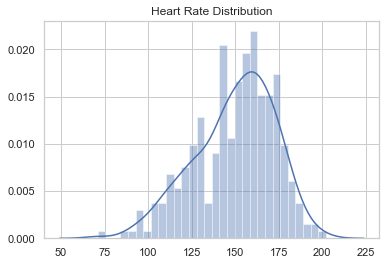

In [594]:
sns.distplot(heart.maxHR, bins=30)
plt.xlabel('')
plt.title('Heart Rate Distribution')
plt.show()

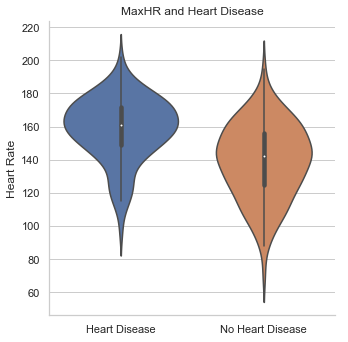

In [677]:
sns.set_style('whitegrid')
sns.catplot(x="result", y="maxHR",
            kind="violin",scale='count', data=heart);
plt.xlabel('')
plt.ylabel('Heart Rate')
plt.title('MaxHR and Heart Disease')
plt.show()


In [583]:
hrwomen= heart.loc[heart.sex==0].maxHR
hrmen= heart.loc[heart.sex==1].maxHR

stats.ttest_ind(hrwomen,hrmen, equal_var = False)



Ttest_indResult(statistic=0.8177982686343681, pvalue=0.414358051512014)

# 5. Does cholesterol level and resting blood pressure have any correlation with heart disease?

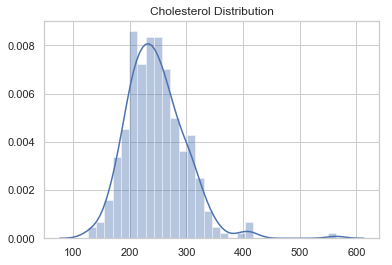

Cholesterol Distribution skews slightly to the right, most of our values are between 200-300


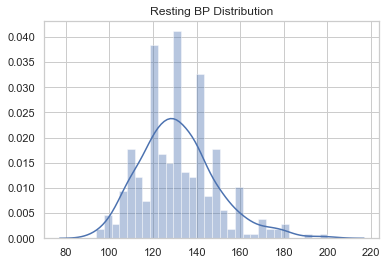

Resting BP skews slightly to the right as well.


In [597]:
sns.distplot(heart.chol, bins=30)
plt.xlabel('')
plt.title('Cholesterol Distribution')
plt.show()
print('Cholesterol Distribution skews slightly to the right, most of our values are between 200-300')
sns.distplot(heart.trestbps, bins=30)
plt.xlabel('')
plt.title('Resting BP Distribution')
plt.show()
print('Resting BP skews slightly to the right as well.')

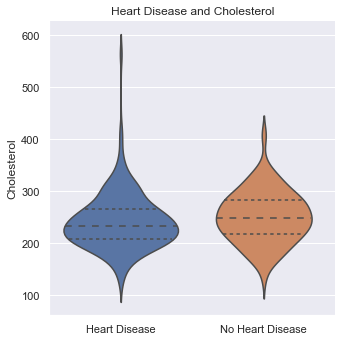

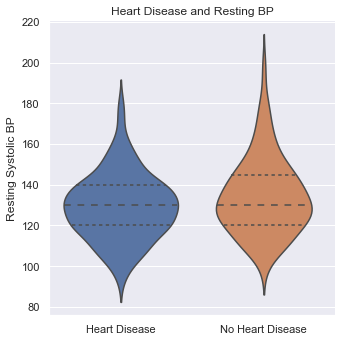

In [682]:
sns.catplot(x="result", y="chol",
            kind="violin",scale='count', inner='quartile', data=heart);
plt.xlabel('')
plt.ylabel('Cholesterol')
plt.title('Heart Disease and Cholesterol')
plt.show()

sns.catplot(x="result", y="trestbps",
            kind="violin",scale='count', inner='quartile', data=heart);
plt.ylabel('Resting Systolic BP')
plt.xlabel('')
plt.title('Heart Disease and Resting BP')
plt.show()

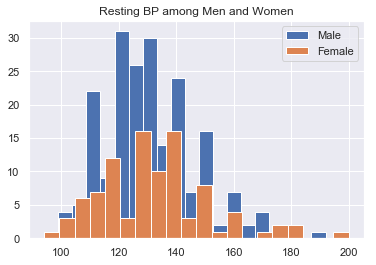

In [683]:
heart[heart.sex==1].trestbps.hist(bins=20);
heart[heart.sex==0].trestbps.hist(bins=20);
labels=('Male', 'Female')
plt.title('Resting BP among Men and Women')
plt.legend(labels)
plt.show()

In [686]:
#our t-test 

womrestbp=heart.loc[heart.sex == 0].trestbps
menrestbp=heart.loc[heart.sex == 1].trestbps
print (stats.ttest_ind(womrestbp,menrestbp, equal_var = True))

print('We FAIL to reject the null hypothesis, there is no difference between BP among men and women ')

Ttest_indResult(statistic=0.9864931536208362, pvalue=0.3246834797221042)
We FAIL to reject the null hypothesis, there is no difference between BP among men and women 


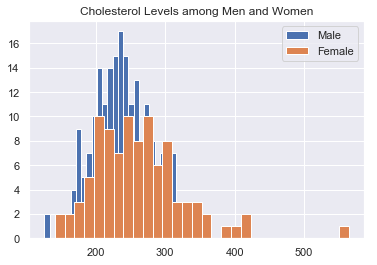

In [684]:
heart[heart.sex==1].chol.hist(bins=30);
heart[heart.sex==0].chol.hist(bins=30);
labels=('Male', 'Female')
plt.title('Cholesterol Levels among Men and Women')
plt.legend(labels)
plt.show()


In [687]:
womchol=heart.loc[heart.sex == 0].chol
menchol=heart.loc[heart.sex == 1].chol
print (stats.ttest_ind(womchol,menchol, equal_var = True))

print('We reject the Null hypothesis! There is a significant difference between men and womens\' cholesterol levels!')



Ttest_indResult(statistic=3.5029368327219244, pvalue=0.000529966610622664)
We reject the Null hypothesis! There is a significant difference between men and womens' cholesterol levels!


In [ ]:
#the null hypothesis that there is no significant difference between specified populations, 
#A large p-value (> 0.05) indicates weak evidence against the null hypothesis, 
#so you fail to reject the null hypothesis.

# Future Research

By answering our questions, we've uncovered more questions. It would ideal to produce another study with similar participants to compare with. Our question regarding why this population had such a higher percentage of heart disease among women is left unanswered. Another significant finding lies with ST-T wave abnormalities. To apply that variable to a larger sample would strengthen the correlation. Though this data set did provided resting systolic BP measurements, it did not show any correlation with heart disease. A better study would be to look at patients with hypertension and their stress test results. 